In [1]:
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from skimage import io, feature, filters, color, restoration, util
from skimage.morphology import watershed
from skimage.future import graph
from skimage.filters import threshold_otsu, threshold_local
from scipy import ndimage as ndi

In [2]:
exec(open('/Users/kpuhger/Documents/count-cellula/src/heq.py').read())
exec(open('/Users/kpuhger/Documents/count-cellula/src/smoothing.py').read())

In [3]:
# load image
img_file = '/Users/kpuhger/Box Sync/count_cellula_imgs/SampleGFP.tif'
img = sk.io.imread(img_file)

next, we'll use adaptive equalization to enhance the image

In [4]:
# step 1 gaussian blur image
img_gauss = gaussian_blur(img, 3)

# step 2 perform adaptive equalization on blurred image
img_gauss_aeq = adapt_eq(img_gauss)

/Users/KPuhger/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


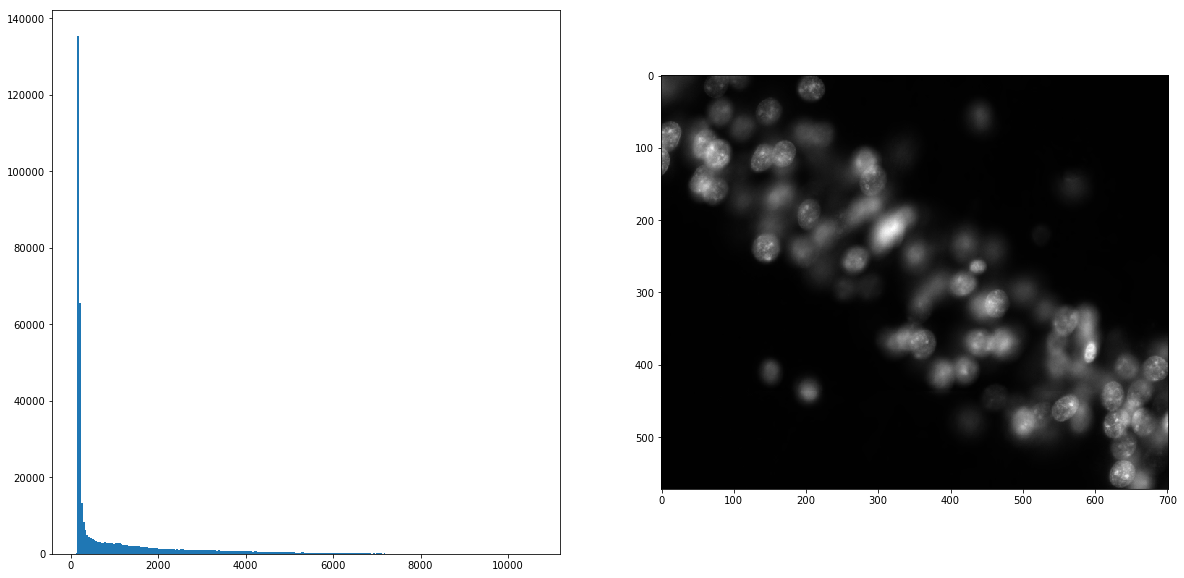

In [5]:
img_hist_stack(img, 9)

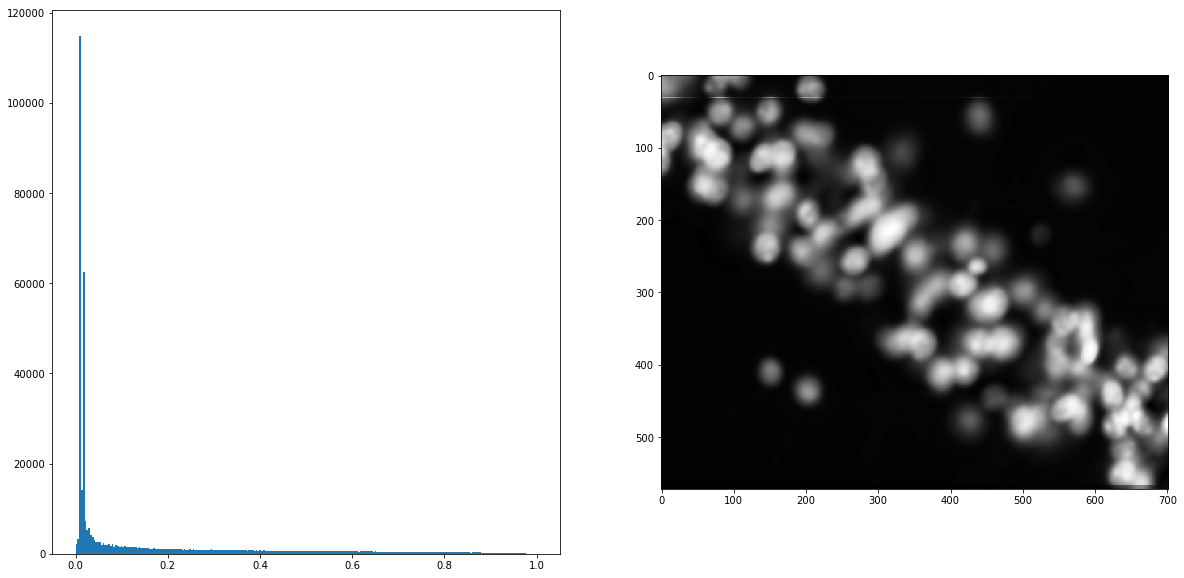

In [6]:
# test image
img_hist_stack(img_gauss_aeq, 9)

In [7]:
img_gauss_aeq_lmax = ndi.maximum_filter(img_gauss_aeq, size = 5)

# test image
#img_hist_stack(seeds_local_max, 9)

## Edge detection - single plane validation

In [8]:
edges1 = filters.sobel(img_gauss_aeq[9, :, :])
edges2 = filters.sobel(img_gauss[9, :, :])
edges3 = filters.sobel(img[9, :, :])

# f, ax = plt.subplots(ncols=3, figsize=(20,20))
# ax[0].imshow(edges1, cmap='gray')
# ax[0].set_axis_off();
# ax[1].imshow(edges2, cmap='gray')
# ax[1].set_axis_off();
# ax[2].imshow(edges3, cmap='gray')
# ax[2].set_axis_off();

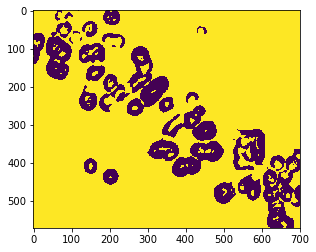

In [9]:
# distance transform of thresholded edges
threshold = filters.threshold_otsu(edges2)
non_edges = (edges2 < threshold)
plt.imshow(non_edges);


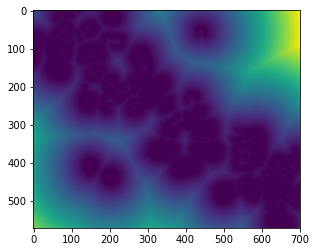

In [10]:
distance_from_edge = ndi.distance_transform_edt(non_edges)

plt.imshow(distance_from_edge, cmap='viridis');

# plt.imshow(distance_from_edge, cmap='gray');

In [12]:
peaks = feature.peak_local_max(distance_from_edge, min_distance=9)
print("Peaks shape:", peaks.shape)



Peaks shape: (215, 2)


In [13]:
print(peaks)

[[562 661]
 [561 660]
 [560 659]
 [559 658]
 [559 657]
 [545 642]
 [529 643]
 [512 646]
 [512 645]
 [498 685]
 [487 670]
 [485 622]
 [482 577]
 [481 577]
 [478 635]
 [478 634]
 [476 639]
 [476 638]
 [475 640]
 [475 639]
 [473 505]
 [468 550]
 [466 605]
 [463 648]
 [462 649]
 [459 629]
 [459 628]
 [456 568]
 [455 568]
 [455 567]
 [446 629]
 [446 628]
 [438 203]
 [434 662]
 [434 661]
 [431 469]
 [427 592]
 [427 591]
 [426 643]
 [426 592]
 [421 500]
 [416 660]
 [415 661]
 [412 679]
 [412 151]
 [411 151]
 [410 151]
 [409 392]
 [409 391]
 [409 152]
 [409 151]
 [408 152]
 [408 151]
 [407 418]
 [407 405]
 [407 151]
 [406 643]
 [406 405]
 [404 578]
 [400 613]
 [400 550]
 [389 429]
 [389 428]
 [388 427]
 [388 426]
 [387 425]
 [381 592]
 [380 593]
 [380 592]
 [380 360]
 [379 593]
 [379 592]
 [379 362]
 [379 361]
 [378 594]
 [378 593]
 [378 364]
 [378 363]
 [377 594]
 [377 593]
 [376 566]
 [370 462]
 [370 445]
 [369 546]
 [369 463]
 [369 444]
 [369 320]
 [368 442]
 [365 347]
 [364 345]
 [364 344]

In [14]:
peaks_image = np.zeros(img_gauss[9, :, :].shape, np.bool)
peaks_image[tuple(np.transpose(peaks))] = True
seeds, num_seeds = ndi.label(peaks_image)

In [19]:
print("Peaks shape:", peaks.shape)
print("Peaks_image shape:", peaks_image.shape)


Peaks shape: (215, 2)
Peaks_image shape: (572, 702)


In [59]:
tuple?

In [58]:
tuple(np.transpose(peaks))

(array([562, 561, 560, 559, 559, 545, 529, 512, 512, 498, 487, 485, 482,
        481, 478, 478, 476, 476, 475, 475, 473, 468, 466, 463, 462, 459,
        459, 456, 455, 455, 446, 446, 438, 434, 434, 431, 427, 427, 426,
        426, 421, 416, 415, 412, 412, 411, 410, 409, 409, 409, 409, 408,
        408, 407, 407, 407, 406, 406, 404, 400, 400, 389, 389, 388, 388,
        387, 381, 380, 380, 380, 379, 379, 379, 379, 378, 378, 378, 378,
        377, 377, 376, 370, 370, 369, 369, 369, 369, 368, 365, 364, 364,
        363, 363, 362, 351, 350, 346, 346, 341, 339, 334, 326, 317, 316,
        316, 315, 304, 303, 302, 298, 291, 290, 287, 287, 275, 264, 264,
        256, 254, 247, 244, 244, 236, 231, 229, 227, 226, 223, 219, 217,
        215, 208, 208, 203, 196, 196, 196, 195, 195, 195, 194, 194, 194,
        194, 193, 193, 192, 192, 191, 183, 182, 180, 167, 167, 167, 166,
        166, 166, 166, 164, 154, 154, 153, 153, 153, 140, 139, 139, 138,
        138, 138, 136, 136, 135, 135, 134, 131, 127

In [15]:
# watershed

ws_edge = watershed(edges2, seeds)

In [16]:
def weight_boundary(graph, src, dst, n):
    default = {'weight': 0.0, 'count': 0}

    count_src = graph[src].get(n, default)['count']
    count_dst = graph[dst].get(n, default)['count']

    weight_src = graph[src].get(n, default)['weight']
    weight_dst = graph[dst].get(n, default)['weight']
    
    count = count_src + count_dst
    weighted_mean = (count_src * weight_src +
                     count_dst * weight_dst) / count

    return {'count': count, 'weight': weighted_mean}


def do_nothing(*args, **kwargs):
    pass

In [17]:
#
rag_graph = graph.rag_boundary(ws_edge, edges2)
seg_cells = graph.merge_hierarchical(ws_edge, rag_graph, thresh=0.013, rag_copy=True,
                                     in_place_merge=True,
                                     merge_func=do_nothing,
                                     weight_func=weight_boundary)

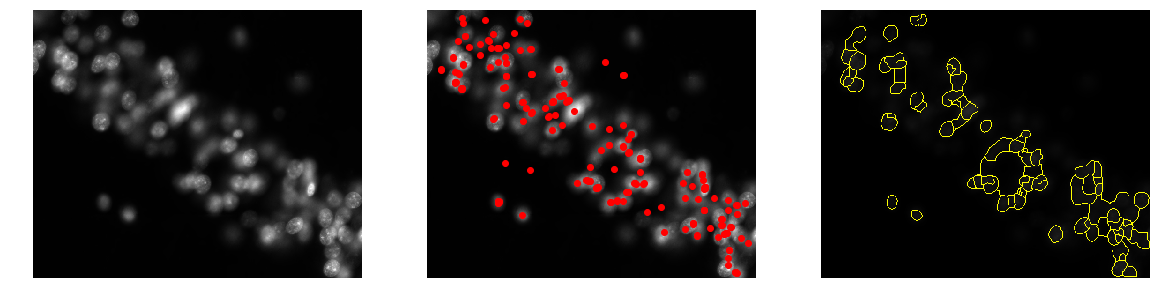

In [18]:
from skimage import segmentation

rag_graph = graph.rag_boundary(ws_edge, edges2)
seg_cells = graph.merge_hierarchical(ws_edge, rag_graph, thresh=0.013, rag_copy=True,
                                     in_place_merge=True,
                                     merge_func=do_nothing,
                                     weight_func=weight_boundary)


fig, ax = plt.subplots(ncols=3, figsize=(20,20))
ax[0].imshow(img[9, :, :], cmap='gray')
ax[0].set_axis_off();
ax[1].imshow(img[9, :, :], cmap='gray')
ax[1].plot(peaks[:, 1], peaks[:, 0], 'ro');
ax[1].set_axis_off();
ax[2].imshow(segmentation.mark_boundaries(img[9, :,:], seg_cells))
ax[2].set_axis_off();

## Edge detection - multiplane

In [78]:
# get edges and peaks and perform watershed segmentation
def edges_stack(img, **kwargs):
    # get edges
    edges = np.empty_like(img)
    for z in range(len(img)):
        edges[z] = filters.sobel(img[z])
    return edges

    # get peaks

def peak_stack(img, **kwargs):
    edges = edges_stack(img)
    threshold = np.empty_like(img)
    # need to figure this out
    non_edges = np.empty_like(img)
    distance_from_edge = np.empty_like(img)
#     peaks_image = np.empty_like(img)
    seeds = np.empty_like(img)
    
    for z in range(len(img)):
        threshold[z, :, :] = filters.threshold_otsu(edges[z, :, :])
        non_edges[z, :, :] = (edges[z, :, :] < threshold[z, :, :])
        distance_from_edge[z, :, :] = ndi.distance_transform_edt(non_edges[z, :, :])

    # return threshold, non_edges, distance_from_edge
        
    for z in range(len(img)):
        if z == 0:
            peaks = feature.peak_local_max(distance_from_edge[0, :, :], min_distance=9)
#             peaks = np.column_stack((peaks, np.zeros((len(peaks)))))
#             peaks_image = np.zeros(img[0, :, :].shape, np.bool)
#             peaks_image[0, :, :][tuple(np.transpose(peaks[0, :, :]))] = True
#             seeds[0, :, :], num_seeds = ndi.label(peaks_image[0, :, :])
#             peaks_image[z, :, :] = np.zeros(img[z, :, :].shape, np.bool)
#             peaks_image_z = peaks_image[0, :, :]
            peaks_image = np.zeros(img[0, :, :].shape, np.bool)
            peaks_image[peaks_image[tuple(np.transpose(peaks))]] = True
            seeds[0, :, :], num_seeds = ndi.label(peaks_image)
            peaks = np.column_stack((peaks, np.zeros((len(peaks)))))
        else:
            new_peaks = feature.peak_local_max(distance_from_edge[z, :, :], min_distance=9)
            new_peaks[new_peaks[tuple(np.transpose(new_peaks))]]= True
#             new_peaks_image = np.zeros(img[z, :, :].shape, np.bool)
#             new_peaks_image[z, :, :][tuple(np.transpose(peaks[z, :, :]))] = True
#             new_seeds[z, :, :], num_seeds = ndi.label(peaks_image[z, :, :]) 
            new_peaks = np.column_stack((new_peaks, np.full((len(new_peaks)), z)))
            peaks = np.concatenate((peaks, new_peaks))

#         peaks[z, :, :] = feature.peak_local_max(distance_from_edge[z, :, :], min_distance=9)
            peaks_image = np.zeros(img[z, :, :].shape, np.bool)
            peaks_image[peaks_image[tuple(np.transpose(peaks))]] = True
            seeds[z, :, :], num_seeds = ndi.label(peaks_image[z, :, :])
    
    return seeds

# watershed
def ws_stack(img, **kwargs):
    ws = np.empty_like(img)
    for z in range(len(img)):
        ws[z, :, :] = watershed(edges[z, :, :], seeds[z, :, :])
    return ws


In [79]:
peak_stack(img_gauss)

/Users/KPuhger/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 572 but corresponding boolean dimension is 140


IndexError: index 555 is out of bounds for axis 0 with size 165

In [61]:
# examining segmentation
def weight_boundary(graph, src, dst, n):
    default = {'weight': 0.0, 'count': 0}

    count_src = graph[src].get(n, default)['count']
    count_dst = graph[dst].get(n, default)['count']

    weight_src = graph[src].get(n, default)['weight']
    weight_dst = graph[dst].get(n, default)['weight']
    
    count = count_src + count_dst
    weighted_mean = (count_src * weight_src +
                     count_dst * weight_dst) / count

    return {'count': count, 'weight': weighted_mean}


def do_nothing(*args, **kwargs):
    pass


def ws_graph(img):
    rag_graph = np.empty_like(img)
    seg_cells = np.empty_like(img)
    for z in range(len(img)):
        rag_graph[z, :, :] = graph.rag_boundary(ws[z, :, :], edges[z, :, :])
        seg_cells[z, :, :] = graph.merge_hierarchical(ws[z, :, :], rag_graph[z, :, :], 
                                                thresh=0.013, rag_copy=True, 
                                                in_place_merge=True, merge_func=do_nothing,
                                     weight_func=weight_boundary)
    return rag_graph
    return seg_cells

def plot_ws_results(ws_img, z):        
    fig, ax = plt.subplots(ncols=3, figsize=(20,20))
    ax[0].imshow(ws_img[z, :, :], cmap='gray')
    ax[0].set_axis_off();
    ax[1].imshow(ws_img[z, :, :], cmap='gray')
    ax[1].plot(peaks[:, 1], peaks[:, 0], 'ro');
    ax[1].set_axis_off();
    ax[2].imshow(segmentation.mark_boundaries(ws_img[z, :, :], seg_cells))
    ax[2].set_axis_off();

In [62]:
peak_stack(img_gauss)

IndexError: arrays used as indices must be of integer (or boolean) type

### threshold-based watershed -- incomplete, currently abandoned

In [7]:
markers1 = rank.gradient(img_guass_aeq_lmax[9, :, :], disk(5)) < 10
markers1 = ndi.label(markers1)[0]

gradient1 = rank.gradient(img_guass_aeq_lmax[9, :, :], disk(2))

/Users/KPuhger/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [8]:
markers2 = np.empty_like(img_gauss_aeq)
for z in range(len(img_guass_aeq_lmax)):
    markers2[z, :, :] = rank.gradient(img_guass_aeq_lmax[z, :, :], disk(5)) < 10
    markers2[z, :, :] = ndi.label(markers2[z, :, :])[0]
    
gradient2 = np.empty_like(img_gauss_aeq)
for z in range(len(img_guass_aeq_lmax)):
    gradient2[z, :, :] = rank.gradient(img_guass_aeq_lmax[z, :, :], disk(2))
    

/Users/KPuhger/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [83]:
# watershed by image
ws_test = np.empty_like(img_gauss_aeq)
for z in range(len(img_gauss_aeq)):
    ws_test[z, :, :] = watershed(gradient2[z], markers2[z], compactness=1)

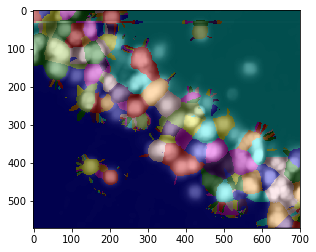

In [84]:
plt.imshow(color.label2rgb(ws_test[1], img_guass_aeq_lmax[9, :, :]));

In [11]:
ws_test.shape

(15, 572, 702)

In [ ]:
from skimage import segmentation
plt.imshow(segmentation.mark_boundaries(img[9, :, :], seg_cells[9, :, :]));

In [ ]:
# seeds = peak_local_max(img_adapteq, min_distance=15, threshold_abs=0.9)

# f, ax = plt.subplots(1,1, figsize=(20,20));
# ax.imshow(img[9, :, :], cmap='gray');
# ax.plot(seeds[:, 1], seeds[:, 0], 'r.');

# median filtering

In [23]:
# # single plane
# median_filter = filters.median(img_gauss[9, :, :], np.ones((7,7)))

/Users/KPuhger/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


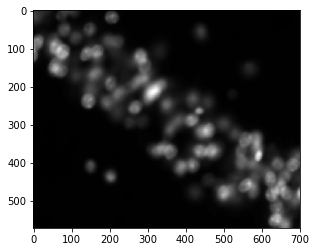

In [24]:
# plt.imshow(median_filter, cmap='gray')

In [50]:

# threshold = threshold_otsu(img_gauss_aeq_lmax)
# bilat = restoration.denoise_bilateral(img_gauss_aeq, win_size=10)
# binary = img_gauss_aeq_lmax > threshold


/Users/KPuhger/miniconda3/lib/python3.6/site-packages/skimage/restoration/_denoise.py:79: UserWarning: denoise_bilateral will default to multichannel=False in v0.15
  warn('denoise_bilateral will default to multichannel=False in v0.15')
/Users/KPuhger/miniconda3/lib/python3.6/site-packages/skimage/restoration/_denoise.py:101: UserWarning: The last axis of the input image is interpreted as channels. Input image with shape (15, 572, 702) has 702 channels in last axis. ``denoise_bilateral`` is implemented for 2D grayscale and color images only
  warn(msg.format(image.shape, image.shape[2]))


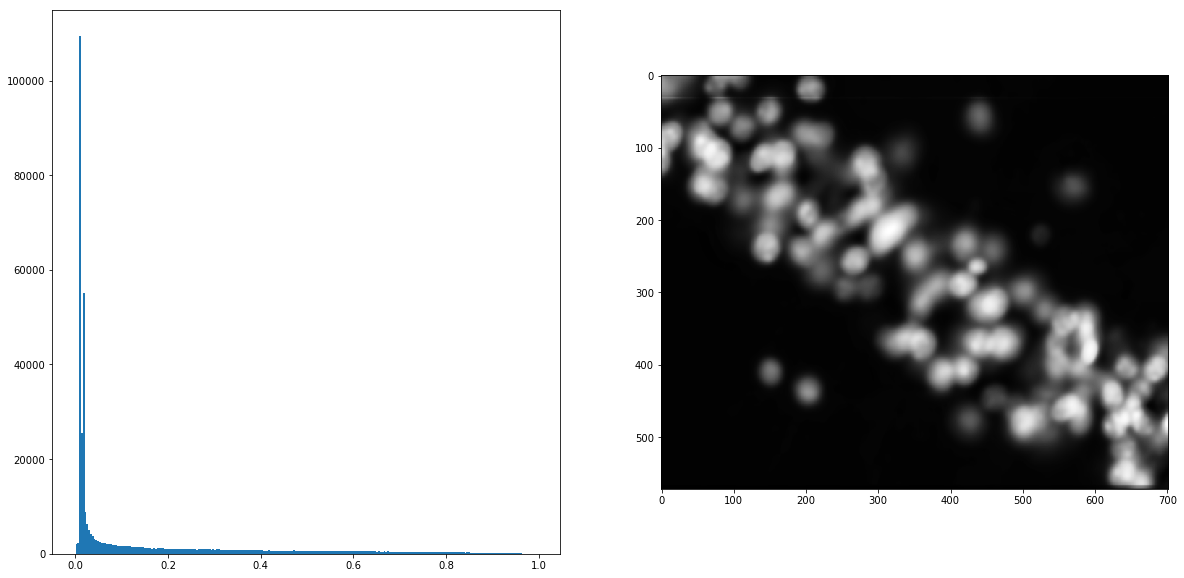

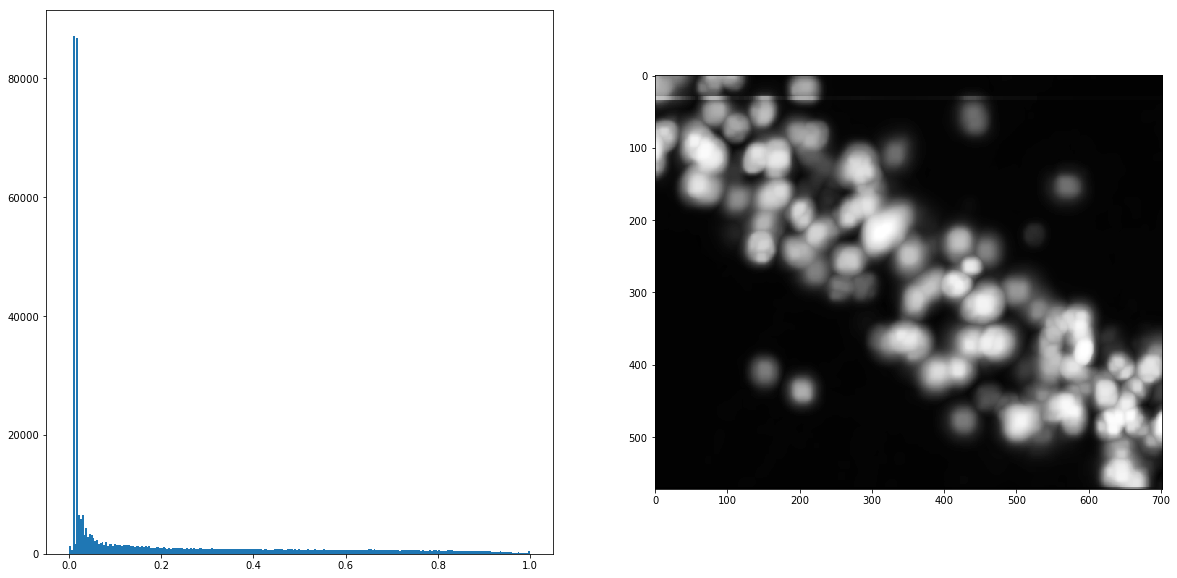

In [51]:
# img_hist_stack(bilat, 9)
# img_hist_stack(img_gauss_aeq_lmax, 9)

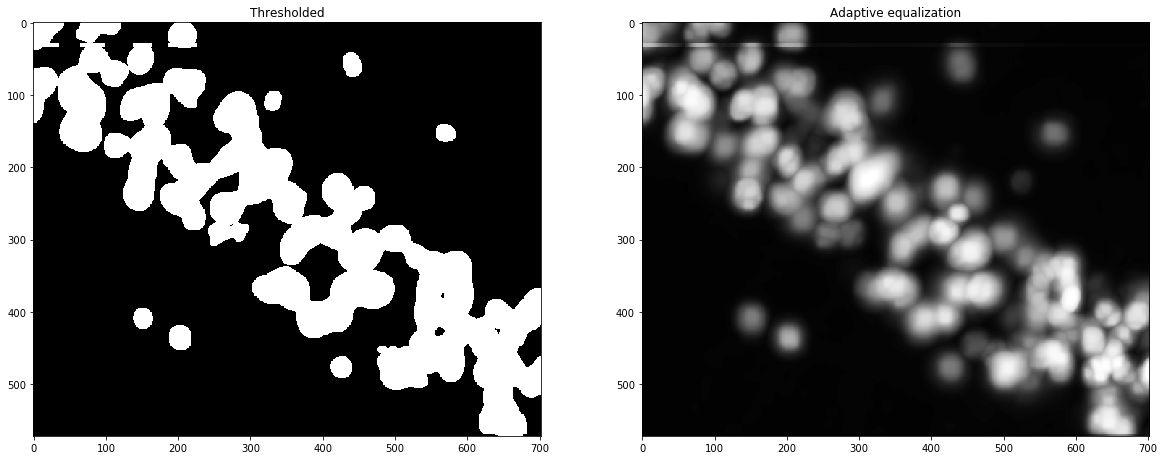

In [65]:
# fig, ax = plt.subplots(ncols=2, figsize=(20,20))
# ax[0].imshow(binary[9, :, :], cmap='gray')
# ax[0].set_title('Thresholded')
# ax[1].imshow(img_gauss_aeq_lmax[9, :, :], cmap='gray')
# ax[1].set_title('Adaptive equalization');

## Future segementation


Watershed combined with region agglomeration makes a very good segmentation, but we missed a coin. How can you improve this?

We missed a seed, so think of a few other ways to place seeds of an image, or to get a finer segmentation at the start. Here's a couple of ideas:
- find peaks in a Gaussian-smoothed image of the coins, and combine those with our original seeds.
- use a different segmentation algorithm from `watershed`, such as `segmentation.felzenszwalb` or `segmentation.slic`, and find its intersection with watershed using `segmentation.join_segmentations`.